# Finding The Likelihood Someone Procrastinates

- Louis Breguet
- a100046
- CS2091
...


For this project, I was interested in looking at the probability someone will procrastinate and what the main cause of it is. I looked at 10 different attributes and selected 1 target variable from those attributes. 

* A `Gender` factor.
* An `Age` variable that just takes an age group.
* A social media variable that takes a range of hours.
* An online shopping factor; do the subjects fully use technology to get up and move around?
* A gaming system variable because I want to know if anyone in the sample plays video games.
* From the above attribute, I want to see the frequency of playing video games.
* Of course, everyone watches movies and tv shows, so there's an attribute for that.
* A phone calls attribute. How long do their phone calls typically last?
* A work variable to see if the subjects are productive.
* A hanging out variable showing the frequency of subjects going out and being with people in a social setting.

The target variable - `Work` - are productive.

In [1084]:
import pandas as pd

data = pd.read_csv('Probability of Procrastination.csv')

data.head(10)

Gender       Age     Social Media  Online Shopping Gaming System  \
0  Female  18 to 21  > 3 hours a day  < 1 hour a week           Yes   
1  Female  18 to 21   > 1 hour a day  < 1 hour a week           Yes   
2  Female  18 to 21  > 3 hours a day  > 1 hour a week            No   
3  Female  18 to 21   > 1 hour a day  < 1 hour a week            No   
4   Other  18 to 21  > 5 hours a day  < 1 hour a week           Yes   
5    Male  22 to 27  > 3 hours a day  < 1 hour a week            No   
6    Male      < 18  > 3 hours a day  < 1 hour a week           Yes   
7  Female  22 to 27  > 3 hours a day  < 1 hour a week           Yes   
8  Female  41 to 60   > 1 hour a day  < 1 hour a week           Yes   
9  Female  18 to 21   > 1 hour a day  > 1 hour a week            No   

    Gaming Frequency    TV Shows/Movies   Phone Calls        Work  Hanging Out  
0   > 3 hours a week   > 3 hours a week    > 1 minute    > 1 hour            3  
1    < 1 hour a week   > 3 hours a week   > 3 minutes   > 6 hours            2  
2                NaN   > 6 hours a week   > 3 minutes   > 3 hours            2  
3                NaN   > 6 hours a week  > 10 minutes   > 3 hours            1  
4    < 1 hour a week  > 20 hours a week  > 10 minutes    < 1 hour            2  
5                NaN    < 1 hour a week   > 3 minutes   > 3 hours            2  
6  > 10 hours a week  > 10 hours a week    < 1 minute  > 10 hours            2  
7    > 1 hour a week   > 3 hours a week  > 30 minutes    > 1 hour            1  
8                NaN    > 1 hour a week   > 3 minutes  > 10 hours            3  
9                NaN   > 6 hours a week   > 3 minutes    > 1 hour            3

Because a lot of this data are strings, I needed to clean the data and change the values to represent a specific age group. I used the median of the range to decide the value. I then changed the numeric value of the string to an integer to better handle the data. Here are the steps I took to achieve this:

In [1085]:
data['Gender'] = data['Gender'].astype('category').cat.codes

data['ageSimp'] = data.apply(lambda x: "17" if x['Age'] == "< 18"
         else "20" if x['Age'] == "18 to 21"
         else "25" if x['Age'] == "22 to 27"
         else "34" if x['Age'] == "28 to 40"
         else "50", axis = 1)
data['Age'] = data['ageSimp'].astype("int")

data['smSimp'] = data.apply(lambda x: "1" if x['Social Media'] == "< 1 hour a day"
         else "2" if x['Social Media'] == "> 1 hour a day"
         else "4" if x['Social Media'] == "> 3 hours a day"
         else "6", axis = 1)
data['Social Media'] = data['smSimp'].astype('int')


data['osSimp'] = data.apply(lambda x: "1" if x['Online Shopping'] == "< 1 hour a week"
         else "2" if x['Online Shopping'] == "> 1 hour a week"
         else "4" if x['Online Shopping'] == "> 3 hours a week"
         else "6", axis = 1)
data['Online Shopping'] = data['osSimp'].astype('int')

data['Gaming System'] = data['Gaming System'].astype('category').cat.codes

data['gfSimp'] = data.apply(lambda x: "1" if x['Gaming Frequency'] == "< 1 hour a week"
         else "2" if x['Gaming Frequency'] == "> 1 hour a week"
         else "4" if x['Gaming Frequency'] == "> 3 hours a week"
         else "7" if x['Gaming Frequency'] == "> 5 hours a week"
         else "15" if x['Gaming Frequency'] == "> 10 hours a week"
         else "24" if x['Gaming Frequency'] == "> 20 hours a week"
         else "0", axis = 1)
data['Gaming Frequency'] = data['gfSimp'].astype('int')

data['tvmSimp'] = data.apply(lambda x: "1" if x['TV Shows/Movies'] == "< 1 hour a week"
         else "2" if x['TV Shows/Movies'] == "> 1 hour a week"
         else "4" if x['TV Shows/Movies'] == "> 3 hours a week"
         else "7" if x['TV Shows/Movies'] == "> 5 hours a week"
         else "15" if x['TV Shows/Movies'] == "> 10 hours a week"
         else "24" if x['TV Shows/Movies'] == "> 20 hours a week"
         else "48", axis = 1)
data['TV Shows/Movies'] = data['tvmSimp'].astype('int')

data['pcSimp'] = data.apply(lambda x: "1" if x['Phone Calls'] == "< 1 minutes"
         else "2" if x['Phone Calls'] == "> 1 minute"
         else "7" if x['Phone Calls'] == "> 3 minutes"
         else "20" if x['Phone Calls'] == "> 10 minutes"
         else "45" if x['Phone Calls'] == "> 30 minutes"
         else "90", axis = 1)
data['Phone Calls'] = data['pcSimp'].astype('int')

data['wSimp'] = data.apply(lambda x: "0" if x['Work'] == "< 1 hour"
         else "2" if x['Work'] == "> 1 hour"
         else "4" if x['Work'] == "> 3 hours"
         else "8" if x['Work'] == "> 6 hours"
         else "12" if x['Work'] == "> 10 hours"
         else "0", axis = 1)
data['Work'] = data['wSimp'].astype('int')


data['Hanging Out'] = data['Hanging Out'].astype('int')

Because I added a few new columns to the data frame, I needed to remove them to properly analyze the data.

In [1086]:
data = data.loc[:, data.columns != 'ageSimp']
data = data.loc[:, data.columns != 'smSimp']
data = data.loc[:, data.columns != 'osSimp']
data = data.loc[:, data.columns != 'gfSimp']
data = data.loc[:, data.columns != 'tvmSimp']
data = data.loc[:, data.columns != 'pcSimp']
data = data.loc[:, data.columns != 'wSimp']

data.head(10)

Gender  Age  Social Media  Online Shopping  Gaming System  \
0       0   20             4                1              1   
1       0   20             2                1              1   
2       0   20             4                2              0   
3       0   20             2                1              0   
4       2   20             6                1              1   
5       1   25             4                1              0   
6       1   17             4                1              1   
7       0   25             4                1              1   
8       0   50             2                1              1   
9       0   20             2                2              0   

   Gaming Frequency  TV Shows/Movies  Phone Calls  Work  Hanging Out  
0                 4                4            2     2            3  
1                 1                4            7     8            2  
2                 0               48            7     4            2  
3                 0               48           20     4            1  
4                 1               24           20     0            2  
5                 0                1            7     4            2  
6                15               15           90    12            2  
7                 2                4           45     2            1  
8                 0                2            7    12            3  
9                 0               48            7     2            3

## Data Exploration

Now I wanted to look at each attribute in detail. We have the total number of the sample and the descriptive values.

In [1087]:
data.describe()

Gender        Age  Social Media  Online Shopping  Gaming System  \
count  46.000000  46.000000     46.000000        46.000000      46.000000   
mean    0.543478  24.847826      3.000000         1.630435       0.478261   
std     0.622058   8.798907      1.460593         1.288560       0.505047   
min     0.000000  17.000000      1.000000         1.000000       0.000000   
25%     0.000000  20.000000      2.000000         1.000000       0.000000   
50%     0.000000  20.000000      2.000000         1.000000       0.000000   
75%     1.000000  25.000000      4.000000         2.000000       1.000000   
max     2.000000  50.000000      6.000000         6.000000       1.000000   

       Gaming Frequency  TV Shows/Movies  Phone Calls       Work  Hanging Out  
count         46.000000        46.000000    46.000000  46.000000    46.000000  
mean           2.913043        17.608696    27.717391   5.130435     3.065217  
std            6.235476        18.596867    32.237082   3.569056     1.936803  
min            0.000000         1.000000     2.000000   0.000000     0.000000  
25%            0.000000         4.000000     7.000000   2.500000     2.000000  
50%            0.500000         4.000000     7.000000   4.000000     3.000000  
75%            2.000000        24.000000    45.000000   8.000000     4.000000  
max           24.000000        48.000000    90.000000  12.000000    10.000000

In our data we can see that there is an equal number of men and women with a small number of people saying `Other`. Here is the percentage of females in the sample:

In [1088]:
females = len(data[data['Gender'] == 0])
female_dist = females / len(data)
print(female_dist)

0.5217391304347826


The percentage of females in this survey is 52%, so it is clear that 

For the rest of the features, I need to use different graphs for better understanding the distribution.

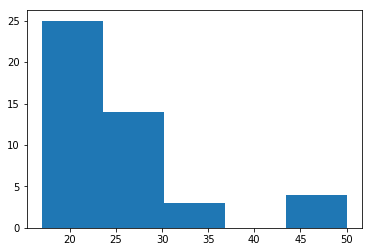

In [1089]:
import matplotlib.pyplot as plt
%matplotlib inline

_ = plt.hist(data['Age'], 5)

We can see that most of the sample are between the ages of 17 and 21. So is it mostly the younger generation that procrastinates more? This [article](http://www.millennialmarketing.com/2009/12/the-problem-of-procrastination/) tells us that millenials have a harder time managing their time. Let's see if that's true with this sample. So first I'll make a copy of my data and add a new column to that data frame. This new column will let me know if the subject is in between the ages of 17 and 21.

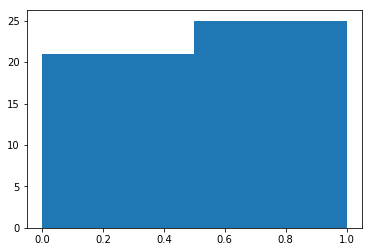

In [1090]:
data['yr'] = data.apply(lambda x: 1 if x['Age'] < 21
                                      else 0, axis = 1)

_ = plt.hist(data['yr'], 2)

In [1091]:
print(len(data[data['yr'] == 1]))

25


I'm also interested in looking at the distribution of `TV Shows/Movies` and compare it to `Ages`. Let's take a look at the histogram below:

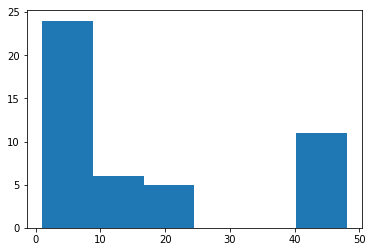

In [1092]:
_ = plt.hist(data['TV Shows/Movies'], 6)

In [1093]:
print(len(data[data['TV Shows/Movies'] > 14]))

22


In [1094]:
print(len(data[data['TV Shows/Movies'] < 15]))

24


There's a pretty split between the two different categories I want to look. So why don't we look at a histogram that looks at the age range I chose with the segment of `TV Shows/Movies`.

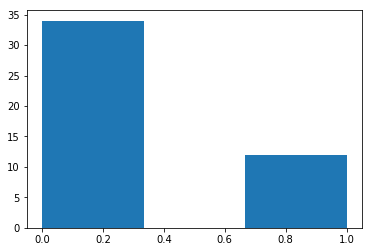

In [1095]:
data['yrp'] = data.apply(lambda x: 1 if x['yr'] == 1 and x['TV Shows/Movies'] > 14
                                              else 0, axis=1)
_ = plt.hist(data['yrp'], 3)

In [1096]:
print(len(data[data['yr'] == 1]) - len(data[data['yrp'] == 1]))

13


Looking at this histogram we can see that there is a pretty equal distribution of the sample. However, from our original range there are 13 people that aren't classified in my procrastination range. So being younger doesn't necessarily mean you procrastinate much.

Now I should look at older generations and add them, if needed to my procrastination range. To do this I'll create a new column for the higher age group and just go through the above steps again.

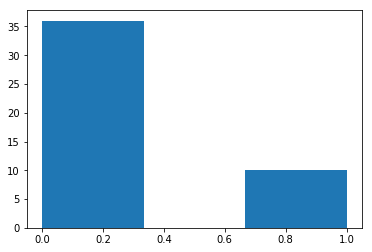

In [1097]:
data['orp'] = data.apply(lambda x: 1 if x['TV Shows/Movies'] > 14 and x['yr'] == 0
                                   else 0, axis=1)
_=plt.hist(data['orp'], 3)

In [1098]:
print(len(data[data['yr'] == 0]) - len(data[data['orp'] == 1]))

11


So here we can see that from the older age group that 13 of them don't seem to suffer from procrastination when placed in front of a movie or a tv show. This could mean that `TV Shows/Movies` isn't the best attribute to target. 

As the last attribute wasn't what I was looking for, I'll continue to check the distributions of the other attributes.

I now check the distribution of time spent on social media. Keep in mind that these values are hours of the day.

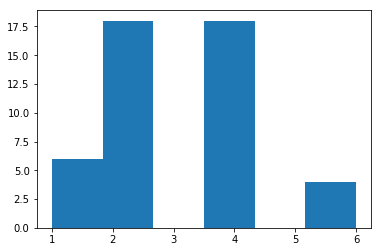

In [1099]:
_ = plt.hist(data['Social Media'], 6)

It would be much more interesting to see these values as weekly ones. We'll go ahead and add a column. Then multiply the daily value by the number of days in a week.

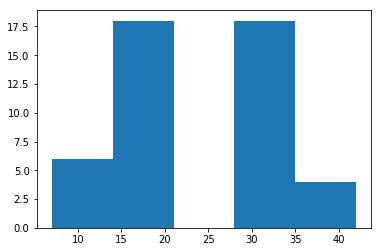

In [1100]:
data['dsm'] = data.apply(lambda x: x['Social Media'] * 7, axis=1)

_ = plt.hist(data['dsm'], 5)

Now that we have the weekly data of `Social Media` usage, I want to see categorize this data between those that go on social media sometimes during the week and those that go on frequently.

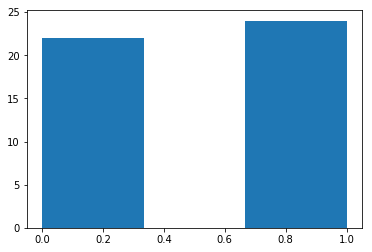

In [1101]:
data['sm_split'] = data.apply(lambda x: 1 if x['dsm'] < 25
         else 0, axis = 1)

_ = plt.hist(data['sm_split'], 3)

Again there's an equal split between those who frequent social media websites and those who go on it sometimes. 

Let's continue plotting the distribution of my attributes. We'll now look at the distribution of if an individual owns a gaming system or not.

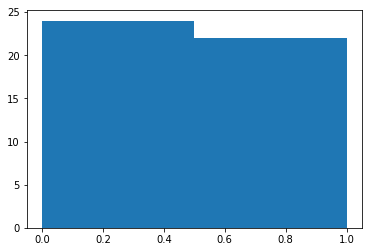

In [1102]:
_ = plt.hist(data['Gaming System'], 2)

Again, there's an equal distribution between the two groups. Continuing on, I looked at the distribution of the frequency of playing video games.

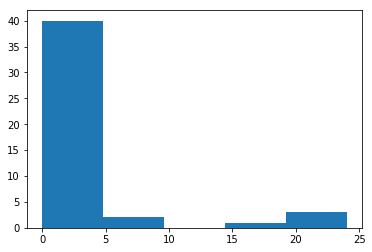

In [1103]:
_ = plt.hist(data['Gaming Frequency'], 5)

This shows us that even though half of the sample owns a console, they don't necessarily play it a lot. We continue our search for our target variable. We'll take a look at the distribution of the `Work` attribute.

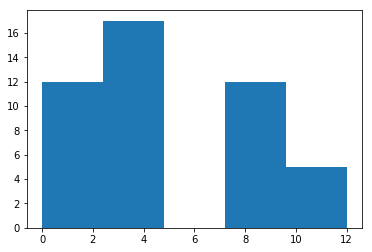

In [1104]:
_ = plt.hist(data['Work'], 5)

From this histogram, we can clearly see that there are individuals in the sample that procrastinate. Instead of looking at how much they work a day, we can look at if they procrastinate or not. To do this I must create a new column and normalize the data surrounding the `Work` attribute.

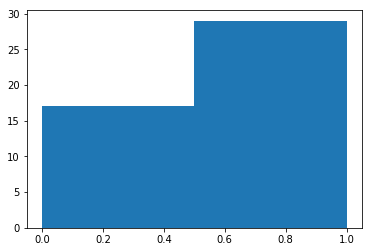

In [1105]:
data['Procrastinates'] = data.apply(lambda x: 1 if x['Work'] < 6
                                   else 0, axis=1)

_ = plt.hist(data['Procrastinates'], 2)

## Modeling

Since I found a good target variable to look at, it's time to build the models. However it is necessary to add another engineering feature to improve the models. 

So now we have to separate the attributes from the target variable. 

In [1107]:
data['SocialMedia'] = data['Social Media']
data['tvm'] = data['TV Shows/Movies']
data['ho'] = data['Hanging Out']

#X = data.loc[:, data.columns != 'Procrastinates']

#y = data['Procrastinates']

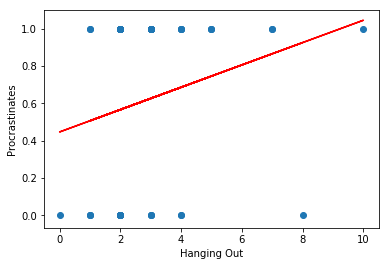

In [1108]:
from sklearn import linear_model
X = data[['ho']]
Y = data['Procrastinates']
lm = linear_model.LinearRegression()
lm.fit(X, Y)

fig, ax = plt.subplots(1, 1) 
ax.scatter(X,Y)
ax.plot(X,lm.predict(data.ho[:, np.newaxis]), color = 'red')
ax.set_xlabel('Hanging Out')
ax.set_ylabel('Procrastinates')
plt.show()

As we can see here, there is a positive correlation between `Hanging Out` and `Procrastinates`. The linear regression line shows that the more people go out, the more they waste time. So the people that go out the least are the most productive.

Let's now classify the data to get an accuracy score to better predict our target.

In [1109]:
data = data.loc[:, data.columns != 'Hang Out']
data = data.loc[:, data.columns != 'Social Media']
data = data.loc[:, data.columns != 'TV Shows/Movies']
data = data.loc[:, data.columns != 'sm_split']
data = data.loc[:, data.columns != 'dsm']
data = data.loc[:, data.columns != 'yr']
data = data.loc[:, data.columns != 'orp']
data = data.loc[:, data.columns != 'yrp']
X = data.loc[:, data.columns != 'Procrastinates']

y = data['Procrastinates']

In [1110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

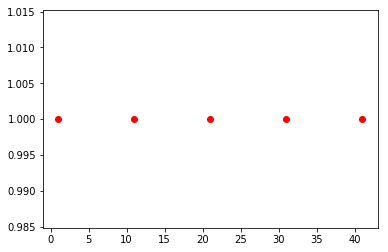

In [1111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

rng = np.arange(1,51,10)
acc = []
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    model.fit(X_train,y_train)
    acc.append(accuracy_score(y_train,model.predict(X_train)))

_ = plt.scatter(rng, acc, c='red')

We can see that this model is the best suited to classify my data. All of the points are lined up and we see no correlation whatsoever. 

I make an attempt to get the accuracy_sore, so I create a model that can give the best result. However, I fear this won't help me because of the results from the last model.

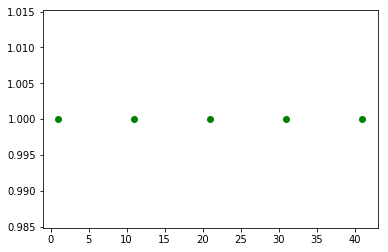

In [1112]:
acc2 =[]
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    model.fit(X,y)
    acc2.append(accuracy_score(y,model.predict(X)))
plt.scatter(rng, acc2, c='green')

This value is the same as all of the others from the previous model, `cross_val_score`. Again, the model isn't suited to classify the data.

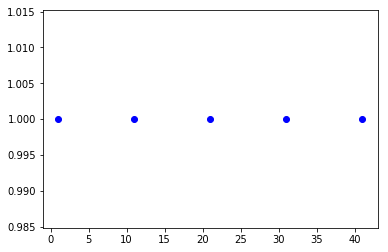

In [1114]:
acc3 = []
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    model.fit(X_train,y_train)
    acc3.append(accuracy_score(y_test,model.predict(X_test)))
plt.scatter(rng, acc3, c='blue')

Just like before, the values are all the same. There isn't any point comparing the models.

So now I'll build a model using a decision tree classifier that draws the learning curve of train and test scores.

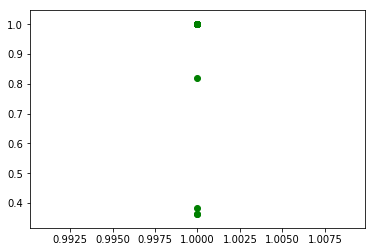

In [1116]:
from sklearn.model_selection import learning_curve
model = DecisionTreeClassifier(max_depth=2)
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=4)
plt.scatter(train_scores, test_scores, c='green')

This output ressembles the output from the previous model, although this one is vertical. However, we can now build a new model using logistic regression and using the same train and test data.

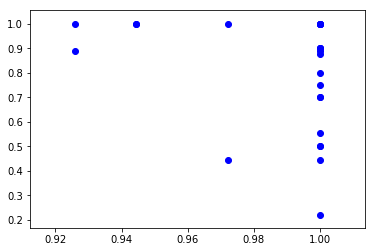

In [1117]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
train_sizes2, train_scores2, test_scores2 = learning_curve(model2, X, y, cv=5)
plt.scatter(train_scores2, test_scores2, c='blue')

The plots are more scattered than they were before. Let's compare the two different models.

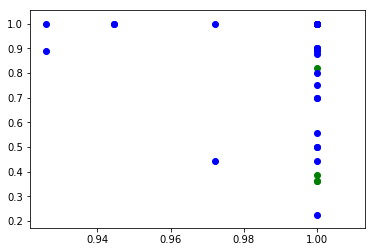

In [1118]:
plt.scatter(train_scores, test_scores, c='green')
plt.scatter(train_scores2, test_scores2, c='blue')

Looking at this comparison we can see that the classifier is essentially plotted alongside the regression model where `X = 1`, so we can conclude that the logistic regression model is better suited for this dataset. 

I continue using different models and choose `Logistic Regression`. We start by adding attributes to our formula and we're using the `formula.api` from `statsmodels`.

In [1121]:
from sklearn.linear_model import LogisticRegression
import math
from patsy import dmatrices
import statsmodels.formula.api as sm

formula = 'Procrastinates ~ Work + SocialMedia + Age + ho + tvm'
y,X = dmatrices(formula, data=data, return_type='dataframe')
model = LogisticRegression()

model = model.fit(X, y.values.ravel())
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

0                  1
0    Intercept    [1.19102195925]
1         Work    [-1.2719499983]
2  SocialMedia   [0.706548062731]
3          Age  [0.0614357233454]
4           ho   [0.311538942376]
5          tvm  [0.0284954197749]

We can observe that the `y-intercept`, which is `Procrastinates`, has a value of 1.19102195925. `Work` is negative because it has a negative correlation with the intercept.

In [1122]:
from sklearn.metrics import classification_report
y_pred = model.predict_proba(X)
y_pred_flag = (y_pred[:,1] > 0.05).astype(int)
print(classification_report(y, y_pred_flag))

             precision    recall  f1-score   support

        0.0       1.00      0.65      0.79        17
        1.0       0.83      1.00      0.91        29

avg / total       0.89      0.87      0.86        46



Here we receive as output the averages of precision, recall, and f1-score. These [averages](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) are a prevalence-weighted macro-average across classes.

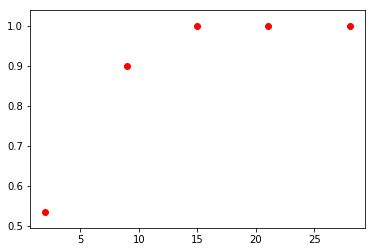

In [1123]:
from sklearn.model_selection import learning_curve

x_example = X_train[:50]
y_example = y_train[:50]

model = DecisionTreeClassifier(max_depth=2)
train_sizes, train_scores, test_scores = learning_curve(model, x_example, y_example, cv=5)
plt.scatter(train_sizes, np.mean(test_scores, axis=1), c='red')
mean_values = np.mean(test_scores, axis=1)

It looks as if this might be the best model yet. For some reason taking a splice from the X and y train's yield better results. There's a visible curve and there's more of a distribution.

More attributes could be added to this data and the survey could've had more options as answers. Gathering the data and mutating wasn't, but I can see that there is a relationship between procrastinating and work. 

We could now do some clustering. This allows us to see the data in small groups to see patterns between different people. So now we add a new column called `cluster` and we'll work around that.

In [1125]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters=10)
arr = clusters.fit_predict(data[['Age', 'Gender', 'Work', 'SocialMedia']])

data['cluster'] = arr

data.sort_values('cluster')

data.groupby('cluster').mean()

Gender     Age  Online Shopping  Gaming System  Gaming Frequency  \
cluster                                                                       
0        0.500000  50.000         2.000000       0.500000          0.250000   
1        0.857143  25.000         1.714286       0.571429          4.428571   
2        0.625000  20.000         2.125000       0.375000          3.625000   
3        0.666667  34.000         1.333333       0.666667          2.666667   
4        0.333333  19.500         1.166667       0.333333          0.833333   
5        0.166667  25.000         2.166667       0.333333          0.666667   
6        0.000000  20.000         1.000000       1.000000          1.000000   
7        2.000000  25.000         1.000000       1.000000         24.000000   
8        1.000000  17.000         1.000000       1.000000         15.000000   
9        0.500000  19.625         1.250000       0.375000          1.875000   

         Phone Calls       Work  Hanging Out  Procrastinates  SocialMedia  \
cluster                                                                     
0          26.500000  10.000000     3.750000             0.0     2.000000   
1          34.428571   2.571429     3.428571             1.0     2.857143   
2          35.125000   0.750000     3.500000             1.0     3.750000   
3          11.333333   9.333333     1.333333             0.0     2.000000   
4          39.000000   4.000000     3.833333             1.0     4.333333   
5          20.500000   8.000000     2.666667             0.0     3.166667   
6           7.000000   8.000000     2.500000             0.0     1.500000   
7           7.000000  12.000000     0.000000             0.0     6.000000   
8          90.000000  12.000000     2.000000             0.0     4.000000   
9          18.125000   4.000000     3.000000             1.0     2.000000   

               tvm        ho  
cluster                       
0         1.500000  3.750000  
1        21.571429  3.428571  
2        26.875000  3.500000  
3        21.666667  1.333333  
4        14.500000  3.833333  
5        20.166667  2.666667  
6         4.000000  2.500000  
7        24.000000  0.000000  
8        15.000000  2.000000  
9        14.750000  3.000000

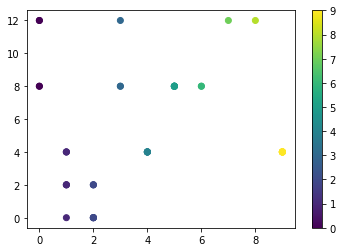

In [1126]:
plt.scatter(data['cluster'], data['Work'], c=arr)
plt.colorbar()

In [ ]:
_ = plt.hist(data['cluster'], 12)

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

dists = pdist(data[0:51], metric="cosine")
links = linkage(dists, method="average")
plt.figure(figsize=(100, 30))
den = dendrogram(links)


In [ ]:
from sklearn.cluster import KMeans
model = KMeans(12)
model.fit(X)
clusters = model.predict(X)
data['cluster'] = clusters

In [ ]:
groups = X.groupby('cluster')
group1 = groups.get_group(0)
group2 = groups.get_group(1)
group3 = groups.get_group(2)
group4 = groups.get_group(3)
group5 = groups.get_group(4)
group6 = groups.get_group(5)
group7 = groups.get_group(6)
group8 = groups.get_group(7)
group9 = groups.get_group(8)
group10 = groups.get_group(9)
group11 = groups.get_group(10)
group12 = groups.get_group(11)

In [ ]:
group1

In [ ]:
group2

In [ ]:
group3

In [821]:
group4

Gender  Age  Online Shopping  Gaming System  Gaming Frequency  \
6        1   17                1              1                15   
32       1   25                1              1                 2   
36       1   17                2              1                 4   
40       1   20                1              1                 4   
45       1   20                1              0                 0   

    Phone Calls  Work  Hanging Out  SocialMedia  tvm  ho  cluster  
6            90    12            2            4   15   2        3  
32           90     8            2            1    2   2        3  
36           90     4            4            2    4   4        3  
40           90     4            2            4    4   2        3  
45           90     0            5            2   15   5        3

In [822]:
group5

Gender  Age  Online Shopping  Gaming System  Gaming Frequency  \
17       1   25                1              1                24   
24       0   20                6              0                 0   

    Phone Calls  Work  Hanging Out  SocialMedia  tvm  ho  cluster  
17           90     0            4            4   48   4        4  
24           90     2            7            6   48   7        4

In [823]:
group6

Gender  Age  Online Shopping  Gaming System  Gaming Frequency  \
16       0   20                4              0                 0   
19       1   25                6              0                 0   
22       1   20                1              1                 1   

    Phone Calls  Work  Hanging Out  SocialMedia  tvm  ho  cluster  
16           45     0            2            4   24   2        5  
19           45     2            5            4   24   5        5  
22           45     4            3            4   15   3        5

In [824]:
group7

Gender  Age  Online Shopping  Gaming System  Gaming Frequency  \
8        0   50                1              1                 0   
21       1   50                4              1                 1   
43       0   50                2              0                 0   

    Phone Calls  Work  Hanging Out  SocialMedia  tvm  ho  cluster  
8             7    12            3            2    2   3        6  
21            2     8            8            4    1   8        6  
43            7     8            2            1    2   2        6

In [825]:
group8

Gender  Age  Online Shopping  Gaming System  Gaming Frequency  \
4        2   20                1              1                 1   
13       1   25                1              1                 4   
18       0   25                1              0                 0   
23       1   34                2              1                 7   
25       2   25                1              1                24   

    Phone Calls  Work  Hanging Out  SocialMedia  tvm  ho  cluster  
4            20     0            2            6   24   2        7  
13            7     4            7            1   24   7        7  
18            7     8            3            2   15   3        7  
23            7     8            2            2   15   2        7  
25            7    12            0            6   24   0        7

In [826]:
group9

Gender  Age  Online Shopping  Gaming System  Gaming Frequency  \
28       1   50                1              0                 0   

    Phone Calls  Work  Hanging Out  SocialMedia  tvm  ho  cluster  
28           90    12            2            1    1   2        8

In [827]:
group10

Gender  Age  Online Shopping  Gaming System  Gaming Frequency  \
39       1   20                1              1                24   

    Phone Calls  Work  Hanging Out  SocialMedia  tvm  ho  cluster  
39            7     0            4            4   48   4        9

In [828]:
group11

Gender  Age  Online Shopping  Gaming System  Gaming Frequency  \
3        0   20                1              0                 0   
10       0   20                1              0                 0   
11       0   25                4              0                 0   
12       1   34                1              1                 1   

    Phone Calls  Work  Hanging Out  SocialMedia  tvm  ho  cluster  
3            20     4            1            2   48   1       10  
10           20     4            2            2   48   2       10  
11           20     8            1            4   48   1       10  
12           20     8            1            2   48   1       10

In [829]:
group12

Gender  Age  Online Shopping  Gaming System  Gaming Frequency  \
26       1   25                1              1                 1   

    Phone Calls  Work  Hanging Out  SocialMedia  tvm  ho  cluster  
26           45     2            3            1   48   3       11

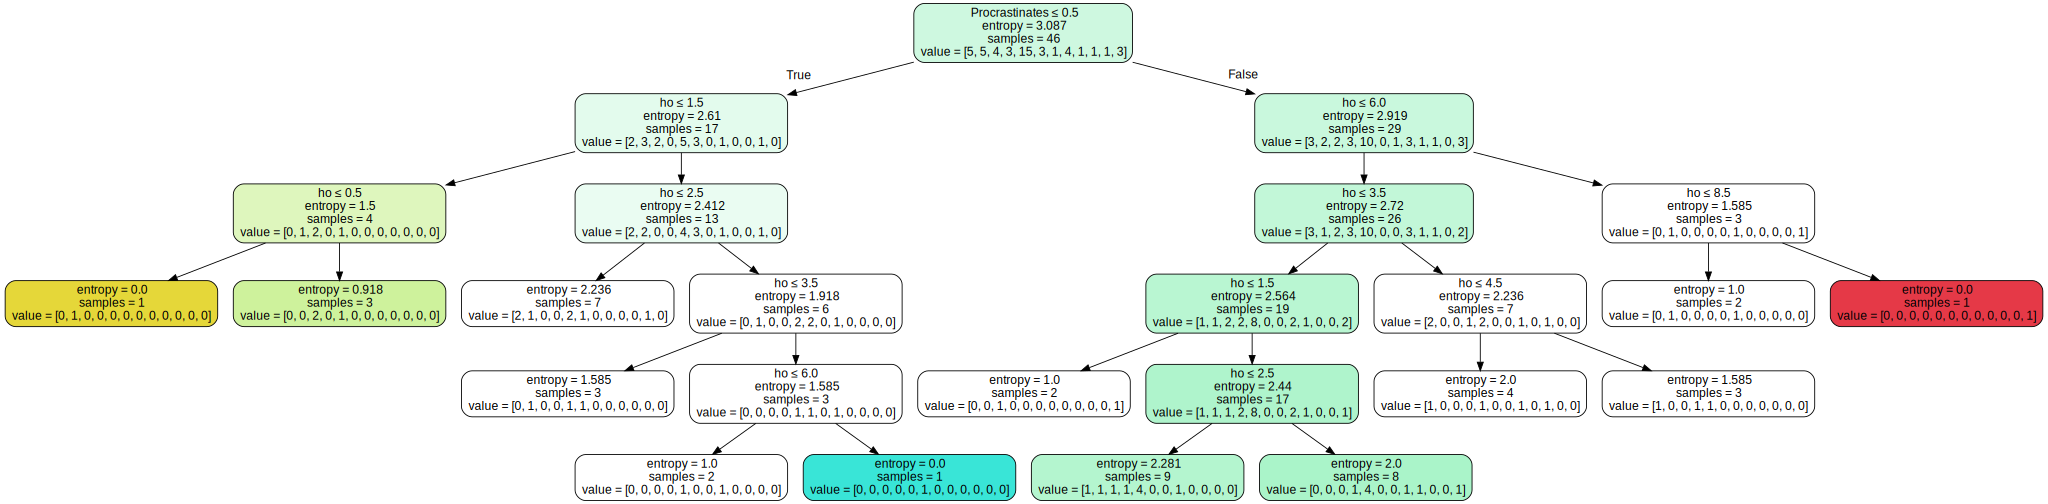

In [834]:
X = data[['ho', 'Procrastinates']]

Y = data['cluster']

from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=8)
clf = clf.fit(X, Y)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns.values,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

## Conclusion

I tried looking at the likelihood someone wastes time instead working. There were many attributes to look at and many that could've added. I found what I needed in the data, but not all the models worked the way they needed. 